In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from startup import np, pd, plt, sns

In [3]:
from startup_gui import widgets, interact, interactive

In [4]:
import sympy as sp

In [5]:
sp.init_printing(use_latex=True)

# Market Equlibrium

In [6]:
params = 'a b S_0 D_0'
a, b, S0, D0, Q_S, Q_D, P, P_m, Q_m = sp.symbols(params + ' ' + 'Q_S Q_D P P_m Q_m', real=True)
da, db, dS0, dD0 = sp.symbols(' '.join(['{\Delta}' + s for s in params.split(' ')]))
dPm, dQm = sp.symbols('{\Delta}P_m {\Delta}Q_m', real=True) 

In [7]:
supply_eqn = sp.Eq(Q_S, S0 + a*P)
supply_eqn

In [8]:
demand_eqn = sp.Eq(Q_D, D0 - b*P)
demand_eqn

In [9]:
market_price_eqn = sp.Eq(P_m, sp.solve(sp.Eq(supply_eqn.rhs, demand_eqn.rhs), P)[0])
market_price_eqn

In [10]:
market_quantity_eqn = supply_eqn.subs({P: market_price_eqn.rhs}).simplify()
market_quantity_eqn

In [11]:
market_eqn = sp.Eq(sp.Matrix([P_m, Q_m]), sp.Matrix([market_price_eqn.rhs, market_quantity_eqn.rhs]))
market_eqn

       ⎡  D₀ - S₀  ⎤
       ⎢  ───────  ⎥
⎡Pₘ⎤   ⎢   a + b   ⎥
⎢  ⎥ = ⎢           ⎥
⎣Qₘ⎦   ⎢D₀⋅a + S₀⋅b⎥
       ⎢───────────⎥
       ⎣   a + b   ⎦

In [12]:
market_sensitivities = sp.Eq(sp.Matrix([dPm, dQm]), market_eqn.rhs.jacobian([a, b, S0, D0]) @ (sp.Matrix([da, db, dS0, dD0])))
market_sensitivities

               ⎡              {\Delta}D₀   {\Delta}S₀   {\Delta}a⋅(D₀ - S₀)   {\Delta}b⋅(D₀ - S₀)              ⎤
               ⎢              ────────── - ────────── - ─────────────────── - ───────────────────              ⎥
               ⎢                a + b        a + b                   2                     2                   ⎥
⎡{\Delta}Pₘ⎤   ⎢                                              (a + b)               (a + b)                    ⎥
⎢          ⎥ = ⎢                                                                                               ⎥
⎣{\Delta}Qₘ⎦   ⎢a⋅{\Delta}D₀   b⋅{\Delta}S₀             ⎛  D₀    D₀⋅a + S₀⋅b⎞             ⎛  S₀    D₀⋅a + S₀⋅b⎞⎥
               ⎢──────────── + ──────────── + {\Delta}a⋅⎜───── - ───────────⎟ + {\Delta}b⋅⎜───── - ───────────⎟⎥
               ⎢   a + b          a + b                 ⎜a + b            2 ⎟             ⎜a + b            2 ⎟⎥
               ⎣                                        ⎝          (a + b)  ⎠             ⎝     

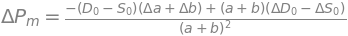

In [13]:
price_sensitivity = sp.Eq(market_sensitivities.lhs[0], market_sensitivities.rhs[0]).simplify()
price_sensitivity

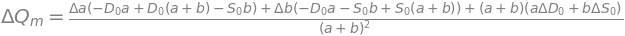

In [14]:
quantity_sensitivity = sp.Eq(market_sensitivities.lhs[1], market_sensitivities.rhs[1]).simplify()
quantity_sensitivity

# Partial Derivatives

In [15]:
x, y, z, u, v, w = sp.symbols('x y z u v w', real=True)

In [16]:
sp.Matrix([-x**4, y**2 - x*y, 5*x - 2*y]).jacobian([x, y])

⎡    3          ⎤
⎢-4⋅x      0    ⎥
⎢               ⎥
⎢ -y    -x + 2⋅y⎥
⎢               ⎥
⎣  5       -2   ⎦

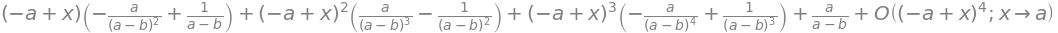

In [17]:
sp.series(x/(x - b), x, a, n=4)

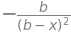

In [18]:
sp.diff(x/(x-b), x).simplify()

In [19]:
sp.diff(sp.log(x/(x-b)), x).simplify()

In [20]:
s, t, x, y = sp.symbols('s t x y')
f, g1, g2, u = [sp.Function(n) for n in 'f g_1 g_2 u'.split()]

In [21]:
sp.Matrix([f(x, y)]).jacobian([x, y]) @ sp.Matrix([g1(s, t), g2(s,t)]).jacobian([s, t])

⎡∂           ∂              ∂           ∂             ∂           ∂              ∂           ∂           ⎤
⎢──(f(x, y))⋅──(g₁(s, t)) + ──(f(x, y))⋅──(g₂(s, t))  ──(f(x, y))⋅──(g₁(s, t)) + ──(f(x, y))⋅──(g₂(s, t))⎥
⎣∂x          ∂s             ∂y          ∂s            ∂x          ∂t             ∂y          ∂t          ⎦

# Matrices, Arrays, and Tensors

In [22]:
A = sp.MatrixSymbol('A', 3, 3).as_explicit()
A

⎡A₀₀  A₀₁  A₀₂⎤
⎢             ⎥
⎢A₁₀  A₁₁  A₁₂⎥
⎢             ⎥
⎣A₂₀  A₂₁  A₂₂⎦

In [23]:
B = sp.Array([v(x, y) for v in sp.symbols('b(:2)(:3)', cls=sp.Function)], (2, 3))
B

⎡b₀₀(x, y)  b₀₁(x, y)  b₀₂(x, y)⎤
⎢                               ⎥
⎣b₁₀(x, y)  b₁₁(x, y)  b₁₂(x, y)⎦

In [24]:
sp.derive_by_array(B, [x, y])

⎡⎡∂              ∂              ∂            ⎤  ⎡∂              ∂              ∂            ⎤⎤
⎢⎢──(b₀₀(x, y))  ──(b₀₁(x, y))  ──(b₀₂(x, y))⎥  ⎢──(b₀₀(x, y))  ──(b₀₁(x, y))  ──(b₀₂(x, y))⎥⎥
⎢⎢∂x             ∂x             ∂x           ⎥  ⎢∂y             ∂y             ∂y           ⎥⎥
⎢⎢                                           ⎥  ⎢                                           ⎥⎥
⎢⎢∂              ∂              ∂            ⎥  ⎢∂              ∂              ∂            ⎥⎥
⎢⎢──(b₁₀(x, y))  ──(b₁₁(x, y))  ──(b₁₂(x, y))⎥  ⎢──(b₁₀(x, y))  ──(b₁₁(x, y))  ──(b₁₂(x, y))⎥⎥
⎣⎣∂x             ∂x             ∂x           ⎦  ⎣∂y             ∂y             ∂y           ⎦⎦

# Change of coordinates

In [25]:
x, y, q = sp.symbols('x y theta', real=True)
r = sp.symbols('r', real=True, positive=True)

In [26]:
f = lambda r, q: [r*sp.cos(q), r*sp.sin(q)]
coord_eqn = sp.Eq(sp.Matrix([x, y]), sp.Matrix(f(r, q)))
coord_eqn

⎡x⎤   ⎡r⋅cos(θ)⎤
⎢ ⎥ = ⎢        ⎥
⎣y⎦   ⎣r⋅sin(θ)⎦

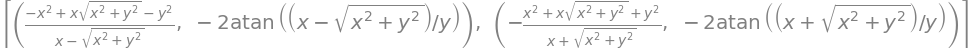

In [27]:
sp.solve(coord_eqn, [r, q])

In [28]:
coord_eqn.rhs.jacobian([r , q])

⎡cos(θ)  -r⋅sin(θ)⎤
⎢                 ⎥
⎣sin(θ)  r⋅cos(θ) ⎦

In [29]:
D = lambda vars, *args: sp.Matrix(args).jacobian(vars)

In [30]:
D([r, q], f(r, q))

⎡cos(θ)  -r⋅sin(θ)⎤
⎢                 ⎥
⎣sin(θ)  r⋅cos(θ) ⎦

In [31]:
D([x, y], [x**2 - y**2, 2*x*y])

⎡2⋅x  -2⋅y⎤
⎢         ⎥
⎣2⋅y  2⋅x ⎦

# Chain Rule - another approach
For $u = u(x,y)$ and $x=x(s,t), y=y(s,t)$ try having $x$ and $y$ as functions.  The trick is to define variables for $x, y$ as both normal symbols and as functions.  You can then use `subs` to substitute in the parameterised form in the chain rule.

In [82]:
u, x_f, y_f = sp.symbols('u x y', cls=sp.Function)
x, y, s, t, r, q = sp.symbols('x y s t r theta', real=True)
f_s, g_s, Df_s, Dg_s = sp.symbols('f g Df Dg', real=True)

In [83]:
f = sp.Matrix([u(x, y)])
sp.Eq(f_s, sp.UnevaluatedExpr(f))

f = [u(x, y)]

In [84]:
sp.Eq(Df_s, sp.UnevaluatedExpr(f.jacobian([x, y])))

     ⎡∂            ∂          ⎤
Df = ⎢──(u(x, y))  ──(u(x, y))⎥
     ⎣∂x           ∂y         ⎦

In [85]:
g = sp.Matrix([x_f(s, t), y_f(s, t)])
sp.Eq(g_s, sp.UnevaluatedExpr(g))

    ⎡x(s, t)⎤
g = ⎢       ⎥
    ⎣y(s, t)⎦

In [86]:
sp.Eq(Dg_s, sp.UnevaluatedExpr(g.jacobian([s,t])))

     ⎡∂            ∂          ⎤
     ⎢──(x(s, t))  ──(x(s, t))⎥
     ⎢∂s           ∂t         ⎥
Dg = ⎢                        ⎥
     ⎢∂            ∂          ⎥
     ⎢──(y(s, t))  ──(y(s, t))⎥
     ⎣∂s           ∂t         ⎦

In [87]:
chain_rule = sp.Eq(f.subs({x: s, y: t}).jacobian([s, t]),  f.jacobian([x, y]) @ g.jacobian([s, t]))
chain_rule

⎡∂            ∂          ⎤   ⎡∂           ∂             ∂           ∂            ∂           ∂             ∂           ∂          ⎤
⎢──(u(s, t))  ──(u(s, t))⎥ = ⎢──(u(x, y))⋅──(x(s, t)) + ──(u(x, y))⋅──(y(s, t))  ──(u(x, y))⋅──(x(s, t)) + ──(u(x, y))⋅──(y(s, t))⎥
⎣∂s           ∂t         ⎦   ⎣∂x          ∂s            ∂y          ∂s           ∂x          ∂t            ∂y          ∂t         ⎦

## Example: Polar Coordinates

In [98]:
chain_rule.rhs.subs({x_f(s, t): s*sp.cos(t), y_f(s, t): s*sp.sin(t)}).applyfunc(lambda e: sp.simplify(e)).subs({s:r, t:q})

⎡       ∂                    ∂                       ∂                      ∂          ⎤
⎢sin(θ)⋅──(u(x, y)) + cos(θ)⋅──(u(x, y))  - r⋅sin(θ)⋅──(u(x, y)) + r⋅cos(θ)⋅──(u(x, y))⎥
⎣       ∂y                   ∂x                      ∂x                     ∂y         ⎦

## Example: Hyperbolic Coordinates

In [99]:
chain_rule.rhs.subs({x_f(s, t): s**2 - t**2, y_f(s, t): 2*s*t}).applyfunc(lambda e: sp.simplify(e))

⎡    ∂                 ∂                ∂                 ∂          ⎤
⎢2⋅s⋅──(u(x, y)) + 2⋅t⋅──(u(x, y))  2⋅s⋅──(u(x, y)) - 2⋅t⋅──(u(x, y))⎥
⎣    ∂x                ∂y               ∂y                ∂x         ⎦

## Change of Coordinates for Partial Derivatives
Goal: get $\frac{\partial u}{\partial x}, \frac{\partial u}{\partial y}$ in terms of $\frac{\partial u}{\partial s}, \frac{\partial u}{\partial t}$

Approach 1: use `sp.solve` 

In [131]:
sp.Eq(
    f.jacobian([x, y]).T, 
    f.jacobian([x, y]).T.subs(
        sp.solve(chain_rule, [u(x, y).diff(x), u(x, y).diff(y)])
    )
)

                ⎡              ∂           ∂                                       ∂           ∂                        ⎤
                ⎢              ──(u(s, t))⋅──(y(s, t))                             ──(u(s, t))⋅──(y(s, t))              ⎥
                ⎢              ∂s          ∂t                                      ∂t          ∂s                       ⎥
                ⎢ ───────────────────────────────────────────────── - ───────────────────────────────────────────────── ⎥
⎡∂          ⎤   ⎢ ∂           ∂             ∂           ∂             ∂           ∂             ∂           ∂           ⎥
⎢──(u(x, y))⎥   ⎢ ──(x(s, t))⋅──(y(s, t)) - ──(x(s, t))⋅──(y(s, t))   ──(x(s, t))⋅──(y(s, t)) - ──(x(s, t))⋅──(y(s, t)) ⎥
⎢∂x         ⎥   ⎢ ∂s          ∂t            ∂t          ∂s            ∂s          ∂t            ∂t          ∂s          ⎥
⎢           ⎥ = ⎢                                                                                                       ⎥
⎢∂          ⎥   ⎢       

Approach 2: use matrix inversion 

In [132]:
sp.Eq(f.jacobian([x, y]).T, (f.jacobian([x, y]).subs({x: s, y: t}) @ g.jacobian([s, t]).inv()).T)

                ⎡              ∂           ∂                                       ∂           ∂                        ⎤
                ⎢              ──(u(s, t))⋅──(y(s, t))                             ──(u(s, t))⋅──(y(s, t))              ⎥
                ⎢              ∂s          ∂t                                      ∂t          ∂s                       ⎥
                ⎢ ───────────────────────────────────────────────── - ───────────────────────────────────────────────── ⎥
⎡∂          ⎤   ⎢ ∂           ∂             ∂           ∂             ∂           ∂             ∂           ∂           ⎥
⎢──(u(x, y))⎥   ⎢ ──(x(s, t))⋅──(y(s, t)) - ──(x(s, t))⋅──(y(s, t))   ──(x(s, t))⋅──(y(s, t)) - ──(x(s, t))⋅──(y(s, t)) ⎥
⎢∂x         ⎥   ⎢ ∂s          ∂t            ∂t          ∂s            ∂s          ∂t            ∂t          ∂s          ⎥
⎢           ⎥ = ⎢                                                                                                       ⎥
⎢∂          ⎥   ⎢       

## Example: Polar Coordinates

In [144]:
eqn_polar = sp.Eq(
    f.jacobian([x, y]).T, 
    (g.jacobian([s, t]).inv().T @ f.jacobian([x, y]).subs({x: s, y: t}).T).subs(
        {x_f(s, t): s*sp.cos(t), y_f(s, t): s*sp.sin(t)}
    ).applyfunc(lambda e: sp.trigsimp(sp.simplify(e))).subs({s:r, t:q})
)
eqn_polar

                ⎡ ⎛           ∂                    ∂          ⎞ ⎤
                ⎢-⎜- r⋅cos(θ)⋅──(u(r, θ)) + sin(θ)⋅──(u(r, θ))⎟ ⎥
⎡∂          ⎤   ⎢ ⎝           ∂r                   ∂θ         ⎠ ⎥
⎢──(u(x, y))⎥   ⎢───────────────────────────────────────────────⎥
⎢∂x         ⎥   ⎢                       r                       ⎥
⎢           ⎥ = ⎢                                               ⎥
⎢∂          ⎥   ⎢            ∂                    ∂             ⎥
⎢──(u(x, y))⎥   ⎢   r⋅sin(θ)⋅──(u(r, θ)) + cos(θ)⋅──(u(r, θ))   ⎥
⎣∂y         ⎦   ⎢            ∂r                   ∂θ            ⎥
                ⎢   ─────────────────────────────────────────   ⎥
                ⎣                       r                       ⎦

Higher order partials?  Just substitute in the partials e.g. below we have the Laplacian in polar coordinates

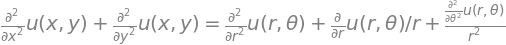

In [157]:
sp.Eq(
    eqn_polar.lhs[0].subs({u(x, y): eqn_polar.lhs[0]}) + eqn_polar.lhs[1].subs({u(x, y): eqn_polar.lhs[1]}), 
    sp.trigsimp(
        (
            eqn_polar.rhs[0].subs({u(r, q): eqn_polar.rhs[0]}) + eqn_polar.rhs[1].subs({u(r, q): eqn_polar.rhs[1]})
        ).simplify().expand()
    )
)